In [1]:
import re
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#load rental properties data
df = pd.read_json('../data/raw_data/properties.json').T

In [3]:
#drop any duplicate instances
df = df[~df.index.duplicated(keep = 'first')]

In [4]:
df.shape

(15236, 10)

In [5]:
df.tail()

,name,cost_text,coordinates,rooms,area,type,bond,features,unverified_features,desc
https://www.domain.com.au/16b-sandy-mount-avenue-inverloch-vic-3996-16006035,16B Sandy Mount Avenue Inverloch VIC 3996,$400.00 per week,"[-38.6340011, 145.725239]","[[2 Beds], [1 Bath], [1 Parking]]",None,House,1738,[],"[Built in wardrobes, Internal Laundry, Secure ...","[This spacious, two bedroom townhouse is perfe..."
https://www.domain.com.au/28-beachcomber-drive-inverloch-vic-3996-15920343,28 Beachcomber Drive Inverloch VIC 3996,$550 wk,"[-38.6412502, 145.7031282]","[[4 Beds], [2 Baths], []]",None,House,2390,[],"[Gas, Internal Laundry, Secure Parking, Furnis...",[The popular Beachcomber estate offers you mod...
https://www.domain.com.au/14-inverloch-parade-inverloch-vic-3996-16040296,14 Inverloch Parade Inverloch VIC 3996,$420 wk,"[-38.6287143, 145.7358082]","[[2 Beds], [1 Bath], []]",None,House,1820,"[Garden, Split System AC, Floorboards]","[Internal Laundry, Heating]","[This two bedroom, 1 bathroom home will surely..."
https://www.domain.com.au/inverloch-vic-3996-14434367,Inverloch VIC 3996,$475 wk,"[-38.6314613, 145.7293638]","[[3 Beds], [2 Baths], [1 Parking]]",None,House,2065,"[Ensuite, Garden, Split System AC, Outdoor Ent...",[Heating],[Neat 3 bedroom home located in the immaculate...
https://www.domain.com.au/64-dixon-street-inverloch-vic-3996-15951739,64 Dixon Street Inverloch VIC 3996,Contact Agent,"[-38.6313719, 145.717275]","[[1 Bed], [1 Bath], []]",200,House,200,[Solar panels],[],[- Street frontage with excellent exposure- Ap...


In [6]:
#extract costs
df["costs"] = df["cost_text"].str.extract(r'(\d+\,*\d*)')

In [7]:
#drop "," in costs 
df["costs"] = df["costs"].apply(lambda x : str(x).replace(',', ''))

In [8]:
#extract number of beds,number of bathrooms and number of parking

rooms = ["beds","baths","parking"]
for i in range(len(rooms)):
    df[rooms[i]] = df["rooms"].str[i].str[0].str.extract(r'(\d+)')
    df[rooms[i]] = df[rooms[i]].fillna(0)


In [9]:
#After extracting the features of number of beds, baths and parking, drop the "rooms" column
df.drop("rooms", axis=1, inplace=True)

In [10]:
#convert data type to numeric
df[["costs", "bond","beds","baths","parking"]] = df[["costs","bond","beds","baths","parking"]].apply(pd.to_numeric,errors='coerce')

In [11]:
#check missing values
df.isnull().sum()

name                       0
cost_text                  0
coordinates                0
area                   14280
type                       0
bond                    1125
features                   0
unverified_features        0
desc                       0
costs                    350
beds                       0
baths                      0
parking                    0
dtype: int64

In [12]:
#As there are too many missing data for internal area, we may drop that feature
df.drop("area", axis=1, inplace=True)


In [13]:
#check the distribution of costs $/pw
df["costs"].describe()

count    1.488600e+04
mean     8.217568e+02
std      3.383780e+04
min      1.000000e+00
25%      3.850000e+02
50%      4.500000e+02
75%      5.650000e+02
max      4.125000e+06
Name: costs, dtype: float64

In [14]:
#check the distributin of bonds $
df["bond"].describe()

count     14111.000000
mean       2262.618808
std        2765.222599
min           1.000000
25%        1651.000000
50%        1955.000000
75%        2433.000000
max      282440.000000
Name: bond, dtype: float64

Text(0.5, 0, 'number of Beds')

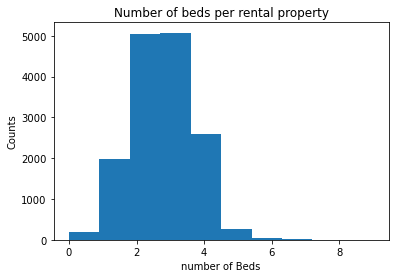

In [15]:
#check 
plt.hist(df.beds) 
plt.title("Number of beds per rental property")
plt.ylabel('Counts')
plt.xlabel('number of Beds')

Text(0.5, 0, 'number of Baths')

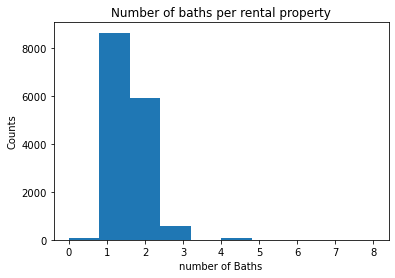

In [16]:
plt.hist(df.baths) 
plt.title("Number of baths per rental property")
plt.ylabel('Counts')
plt.xlabel('number of Baths')

Text(0.5, 0, 'number of parking')

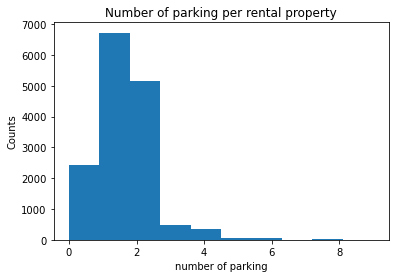

In [17]:
plt.hist(df.parking) 
plt.title("Number of parking per rental property")
plt.ylabel('Counts')
plt.xlabel('number of parking')

In [18]:
df.tail()

,name,cost_text,coordinates,type,bond,features,unverified_features,desc,costs,beds,baths,parking
https://www.domain.com.au/16b-sandy-mount-avenue-inverloch-vic-3996-16006035,16B Sandy Mount Avenue Inverloch VIC 3996,$400.00 per week,"[-38.6340011, 145.725239]",House,1738.0,[],"[Built in wardrobes, Internal Laundry, Secure ...","[This spacious, two bedroom townhouse is perfe...",400.0,2,1,1
https://www.domain.com.au/28-beachcomber-drive-inverloch-vic-3996-15920343,28 Beachcomber Drive Inverloch VIC 3996,$550 wk,"[-38.6412502, 145.7031282]",House,2390.0,[],"[Gas, Internal Laundry, Secure Parking, Furnis...",[The popular Beachcomber estate offers you mod...,550.0,4,2,0
https://www.domain.com.au/14-inverloch-parade-inverloch-vic-3996-16040296,14 Inverloch Parade Inverloch VIC 3996,$420 wk,"[-38.6287143, 145.7358082]",House,1820.0,"[Garden, Split System AC, Floorboards]","[Internal Laundry, Heating]","[This two bedroom, 1 bathroom home will surely...",420.0,2,1,0
https://www.domain.com.au/inverloch-vic-3996-14434367,Inverloch VIC 3996,$475 wk,"[-38.6314613, 145.7293638]",House,2065.0,"[Ensuite, Garden, Split System AC, Outdoor Ent...",[Heating],[Neat 3 bedroom home located in the immaculate...,475.0,3,2,1
https://www.domain.com.au/64-dixon-street-inverloch-vic-3996-15951739,64 Dixon Street Inverloch VIC 3996,Contact Agent,"[-38.6313719, 145.717275]",House,200.0,[Solar panels],[],[- Street frontage with excellent exposure- Ap...,NaN,1,1,0


In [19]:
df.to_csv('../data/raw_data/properties.csv',index = False)